<a href="https://colab.research.google.com/github/CastanharoA/_projetos/blob/master/Analise_b3_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dados da B3, pela biblioteca Yahoo


In [1]:
#bibliotecas
!pip install pandoc
import pandoc
# Importando as Bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader.data as web


  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.0/127.0 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 5.7 MB/s eta 0:00:00
  Created wheel for pandoc: filename=pandoc-2.3-py3-none-any.whl size=33261 sha256=7e67b0fbc6ead11ae58d09461c4c4a9e52e800ad9b7dd01d618e46c02c7063c2
  Stored in directory: /root/.cache/pip/wheels/76/27/c2/c26175310aadcb8741b77657a1bb49c50cc7d4cdbf9eee0005
Successfully built pandoc


In [2]:
  # Importando o YFinance e sobrescrevendo os métodos do pandas_datareader
import yfinance as yf
yf.pdr_override()

In [3]:
# Baixando as cotações do Yahoo Finance para o Índice Bovespa
ibov = web.get_data_yahoo('^BVSP')

[*********************100%%**********************]  1 of 1 completed


In [4]:
# Exibindo as cotações mais antigas
ibov.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1993-04-27,24.799999,25.400000,24.500000,24.500000,24.500000,0
1993-04-28,24.500000,24.600000,23.700001,24.299999,24.299999,0
1993-04-29,24.299999,24.799999,23.700001,23.700001,23.700001,0
1993-04-30,23.700001,24.200001,23.700001,24.100000,24.100000,0
1993-05-03,24.100000,24.400000,23.799999,24.100000,24.100000,0


In [5]:
# Exibindo as cotações mais recentes
ibov.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-10-18,115907.000000,115907.00000,113952.000000,114060.000000,114060.000000,15492200
2023-10-19,114059.000000,115063.00000,113768.000000,114004.000000,114004.000000,11497600
2023-10-20,113996.000000,114090.00000,112533.000000,113155.000000,113155.000000,0
2023-10-23,113145.000000,113680.00000,112164.000000,112785.000000,112785.000000,10701800
2023-10-24,112813.828125,114248.71875,112813.828125,113948.171875,113948.171875,0


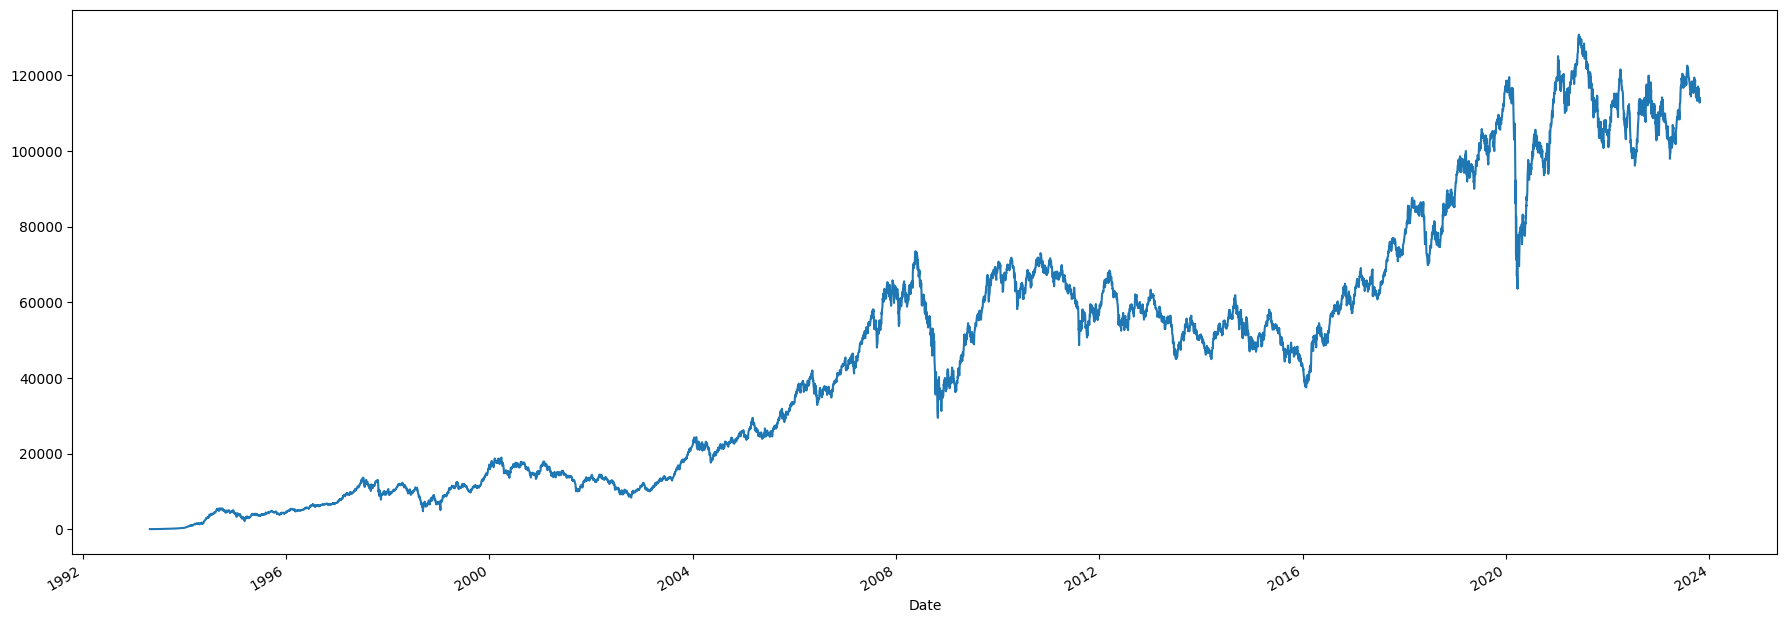

In [6]:
# Plotando o gráfico com o preços de fechamento do Índice Bovespa
ibov["Close"].plot(figsize=(22,8));

In [15]:
# Baixando as cotações do Yahoo Finance para o Índice Bovespa para ITUB4
# data de. comercializaçao  2000-12-21
ibov_itub4 = web.get_data_yahoo('itub4.SA', start='2000-12-21', end='2023-06-21')

[*********************100%%**********************]  1 of 1 completed


In [14]:
ibov_itub4.head() #antiga

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-12-21,2.815505,2.988535,2.815174,2.960552,1.704615,74224
2000-12-22,2.930748,2.930748,2.814843,2.832229,1.630730,23312
2000-12-25,2.832229,2.832229,2.832229,2.832229,1.630730,0
2000-12-26,2.816664,2.834712,2.790006,2.831401,1.630254,7851
2000-12-27,2.881074,2.927437,2.831401,2.927437,1.685549,26996


In [16]:
ibov_itub4.tail() #recente

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-06-14,27.969999,28.219999,27.770000,28.190001,27.588177,49889400
2023-06-15,28.100000,28.600000,28.080000,28.559999,27.950277,26763200
2023-06-16,28.490000,28.840000,28.250000,28.650000,28.038353,41611300
2023-06-19,28.580000,29.100000,28.540001,29.040001,28.420033,16269200
2023-06-20,28.809999,28.809999,28.360001,28.760000,28.406498,24844600


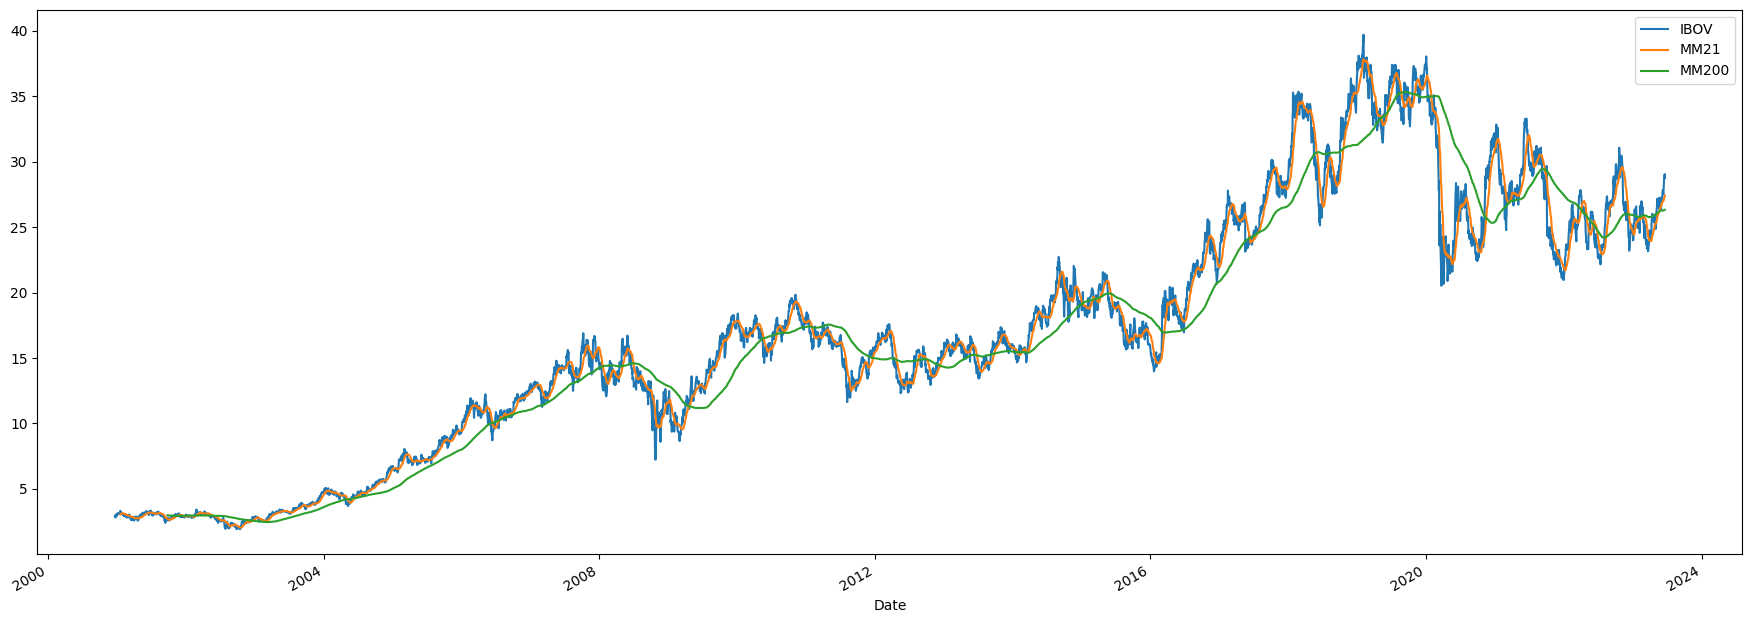

In [17]:
ibov_itub4["Close"].plot(figsize=(22,8), label="IBOV")
#  aplica uma função de janela deslizante. calculada uma média móvel 21 dias.
#Isso significa que para cada ponto no conjunto de dados,
#é considerada uma janela de 21 dias (incluindo o ponto atual e os 20 dias anteriores)
ibov_itub4["Close"].rolling(21).mean().plot(label="MM21")
ibov_itub4["Close"].rolling(200).mean().plot(label="MM200")
plt.legend()

In [18]:
#encontrando a maior  queda do periodo
import pandas as pd
import numpy as np

# Calcular as variações percentuais diárias
ibov_itub4["Daily Change"] = ibov["Close"].pct_change()

# Encontrar o período de maior queda
max_drawdown = ibov_itub4["Daily Change"].min()
start_date = ibov_itub4[ibov_itub4["Daily Change"] == max_drawdown].index[0]
end_date = ibov_itub4[ibov_itub4["Daily Change"] == max_drawdown].index[-1]

# Converter as datas para valores numéricos (dias inteiros)
x1 = (start_date - ibov_itub4.index.min()).days
x2 = (end_date - ibov_itub4.index.min()).days

# Preços correspondentes
y1 = ibov_itub4.loc[start_date]["Close"]
y2 = ibov_itub4.loc[end_date]["Close"]

# Calcular os coeficientes da função de primeiro grau (y = mx + b)
coefficients = np.polyfit([x1, x2], [y1, y2], 1)

# Coeficiente angular (m) da função de primeiro grau
m = coefficients[0]

# Coeficiente linear (b) da função de primeiro grau
b = coefficients[1]

print("Maior queda percentual:", max_drawdown)
print("Período de queda:", start_date, "a", end_date)
print("Função de primeiro grau que representa a queda: y =", m, "x +", b)

Maior queda percentual: -0.147796785290768
Período de queda: 2020-03-12 00:00:00 a 2020-03-12 00:00:00
Função de primeiro grau que representa a queda: y = 0.0016806722960739015 x + 11.800000190734858


/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3553: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


In [23]:
ibov_itub4_1 = web.get_data_yahoo('itub4.SA', start='2020-04-12', end='2023-06-21')



[*********************100%%**********************]  1 of 1 completed


In [27]:
#encontrando a maior  queda do periodo
import pandas as pd
import numpy as np

# Calcular as variações percentuais diárias
ibov_itub4_1["Daily Change"] = ibov["Close"].pct_change()

# Encontrar o período de maior queda
max_drawdown = ibov_itub4_1["Daily Change"].min()
start_date = ibov_itub4_1[ibov_itub4_1["Daily Change"] == max_drawdown].index[0]
end_date = ibov_itub4_1[ibov_itub4_1["Daily Change"] == max_drawdown].index[-1]

# Converter as datas para valores numéricos (dias inteiros)
x1 = (start_date - ibov_itub4_1.index.min()).days
x2 = (end_date - ibov_itub4_1.index.min()).days

# Preços correspondentes
y1 = ibov_itub4_1.loc[start_date]["Close"]
y2 = ibov_itub4_1.loc[end_date]["Close"]

# Calcular os coeficientes da função de primeiro grau (y = mx + b)
coefficients = np.polyfit([x1, x2], [y1, y2], 1)

# Coeficiente angular (m) da função de primeiro grau
m = coefficients[0]

# Coeficiente linear (b) da função de primeiro grau
b = coefficients[1]

print("Maior queda percentual:", max_drawdown)
print("Período de queda:", start_date, "a", end_date)
print("Função de primeiro grau que representa a queda: y =", m, "x +", b)

Maior queda percentual: -0.05449775959233372
Período de queda: 2020-04-24 00:00:00 a 2020-04-24 00:00:00
Função de primeiro grau que representa a queda: y = 0.9490908709439363 x + 10.439999580383295


/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3553: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


In [30]:
ibov_itub4_2 = web.get_data_yahoo('itub4.SA', start='2020-04-25', end='2023-06-21')


[*********************100%%**********************]  1 of 1 completed


In [31]:
#encontrando a maior  queda do periodo
import pandas as pd
import numpy as np

# Calcular as variações percentuais diárias
ibov_itub4_2["Daily Change"] = ibov["Close"].pct_change()

# Encontrar o período de maior queda
max_drawdown = ibov_itub4_2["Daily Change"].min()
start_date = ibov_itub4_2[ibov_itub4_2["Daily Change"] == max_drawdown].index[0]
end_date = ibov_itub4_2[ibov_itub4_2["Daily Change"] == max_drawdown].index[-1]

# Converter as datas para valores numéricos (dias inteiros)
x1 = (start_date - ibov_itub4_2.index.min()).days
x2 = (end_date - ibov_itub4_2.index.min()).days

# Preços correspondentes
y1 = ibov_itub4_2.loc[start_date]["Close"]
y2 = ibov_itub4_2.loc[end_date]["Close"]

# Calcular os coeficientes da função de primeiro grau (y = mx + b)
coefficients = np.polyfit([x1, x2], [y1, y2], 1)

# Coeficiente angular (m) da função de primeiro grau
m = coefficients[0]

# Coeficiente linear (b) da função de primeiro grau
b = coefficients[1]

print("Maior queda percentual:", max_drawdown)
print("Período de queda:", start_date, "a", end_date)
print("Função de primeiro grau que representa a queda: y =", m, "x +", b)

Maior queda percentual: -0.05120086233031296
Período de queda: 2021-02-22 00:00:00 a 2021-02-22 00:00:00
Função de primeiro grau que representa a queda: y = 0.04254152925307568 x + 12.805000305175778


/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3553: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


In [33]:
ibov_itub4_2 = web.get_data_yahoo('itub4.SA', start='2021-02-23', end='2023-06-21')

[*********************100%%**********************]  1 of 1 completed


In [34]:
#encontrando a maior  queda do periodo
import pandas as pd
import numpy as np

# Calcular as variações percentuais diárias
ibov_itub4_2["Daily Change"] = ibov["Close"].pct_change()

# Encontrar o período de maior queda
max_drawdown = ibov_itub4_2["Daily Change"].min()
start_date = ibov_itub4_2[ibov_itub4_2["Daily Change"] == max_drawdown].index[0]
end_date = ibov_itub4_2[ibov_itub4_2["Daily Change"] == max_drawdown].index[-1]

# Converter as datas para valores numéricos (dias inteiros)
x1 = (start_date - ibov_itub4_2.index.min()).days
x2 = (end_date - ibov_itub4_2.index.min()).days

# Preços correspondentes
y1 = ibov_itub4_2.loc[start_date]["Close"]
y2 = ibov_itub4_2.loc[end_date]["Close"]

# Calcular os coeficientes da função de primeiro grau (y = mx + b)
coefficients = np.polyfit([x1, x2], [y1, y2], 1)

# Coeficiente angular (m) da função de primeiro grau
m = coefficients[0]

# Coeficiente linear (b) da função de primeiro grau
b = coefficients[1]

print("Maior queda percentual:", max_drawdown)
print("Período de queda:", start_date, "a", end_date)
print("Função de primeiro grau que representa a queda: y =", m, "x +", b)

Maior queda percentual: -0.03984305828023815
Período de queda: 2021-03-08 00:00:00 a 2021-03-08 00:00:00
Função de primeiro grau que representa a queda: y = 1.0288461538461537 x + 13.374999999999991


/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3553: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


In [36]:
ibov_itub4_3 = web.get_data_yahoo('itub4.SA', start='2021-03-09', end='2023-06-21')

[*********************100%%**********************]  1 of 1 completed


In [37]:
#encontrando a maior  queda do periodo
import pandas as pd
import numpy as np

# Calcular as variações percentuais diárias
ibov_itub4_3["Daily Change"] = ibov["Close"].pct_change()

# Encontrar o período de maior queda
max_drawdown = ibov_itub4_3["Daily Change"].min()
start_date = ibov_itub4_3[ibov_itub4_3["Daily Change"] == max_drawdown].index[0]
end_date = ibov_itub4_3[ibov_itub4_3["Daily Change"] == max_drawdown].index[-1]

# Converter as datas para valores numéricos (dias inteiros)
x1 = (start_date - ibov_itub4_3.index.min()).days
x2 = (end_date - ibov_itub4_3.index.min()).days

# Preços correspondentes
y1 = ibov_itub4_3.loc[start_date]["Close"]
y2 = ibov_itub4_3.loc[end_date]["Close"]

# Calcular os coeficientes da função de primeiro grau (y = mx + b)
coefficients = np.polyfit([x1, x2], [y1, y2], 1)

# Coeficiente angular (m) da função de primeiro grau
m = coefficients[0]

# Coeficiente linear (b) da função de primeiro grau
b = coefficients[1]

print("Maior queda percentual:", max_drawdown)
print("Período de queda:", start_date, "a", end_date)
print("Função de primeiro grau que representa a queda: y =", m, "x +", b)

Maior queda percentual: -0.03780468146840987
Período de queda: 2021-09-08 00:00:00 a 2021-09-08 00:00:00
Função de primeiro grau que representa a queda: y = 0.07846994347911063 x + 14.359999656677239


/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3553: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


In [42]:
ibov_itub4_4 = web.get_data_yahoo('itub4.SA', start='2021-09-10', end='2023-06-21')

[*********************100%%**********************]  1 of 1 completed


In [44]:
#encontrando a maior  queda do periodo
import pandas as pd
import numpy as np

# Calcular as variações percentuais diárias
ibov_itub4_4["Daily Change"] = ibov["Close"].pct_change()

# Encontrar o período de maior queda
max_drawdown = ibov_itub4_4["Daily Change"].min()
start_date = ibov_itub4_4[ibov_itub4_4["Daily Change"] == max_drawdown].index[0]
end_date = ibov_itub4_4[ibov_itub4_4["Daily Change"] == max_drawdown].index[-1]

# Converter as datas para valores numéricos (dias inteiros)
x1 = (start_date - ibov_itub4_4.index.min()).days
x2 = (end_date - ibov_itub4_4.index.min()).days

# Preços correspondentes
y1 = ibov_itub4_4.loc[start_date]["Close"]
y2 = ibov_itub4_4.loc[end_date]["Close"]

# Calcular os coeficientes da função de primeiro grau (y = mx + b)
coefficients = np.polyfit([x1, x2], [y1, y2], 1)

# Coeficiente angular (m) da função de primeiro grau
m = coefficients[0]

# Coeficiente linear (b) da função de primeiro grau
b = coefficients[1]

print("Maior queda percentual:", max_drawdown)
print("Período de queda:", start_date, "a", end_date)
print("Função de primeiro grau que representa a queda: y =", m, "x +", b)

Maior queda percentual: -0.03390006710077398
Período de queda: 2021-11-26 00:00:00 a 2021-11-26 00:00:00
Função de primeiro grau que representa a queda: y = 0.1481168796489765 x + 11.404999732971186


/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3553: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


In [47]:
ibov_itub4_5 = web.get_data_yahoo('itub4.SA', start='2021-11-27', end='2023-06-21')

[*********************100%%**********************]  1 of 1 completed


/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3553: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


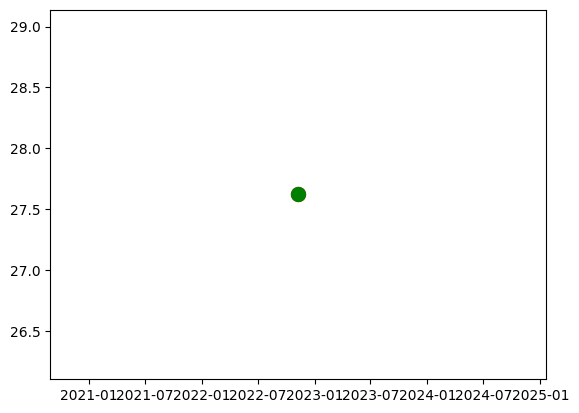

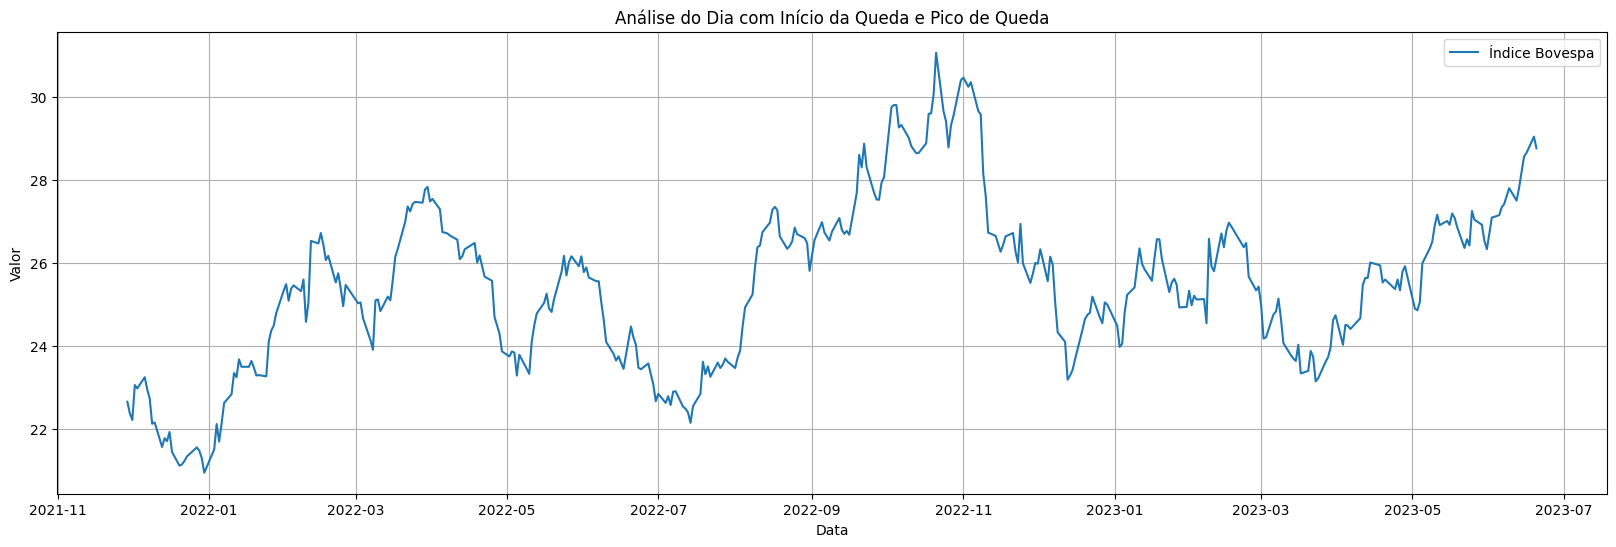

Maior queda percentual: -0.03350061630568757
Período de queda: 2022-11-10 00:00:00 a 2022-11-10 00:00:00
Função de primeiro grau que representa a queda: y = 0.03991329601045288 x + 13.81000041961669


In [59]:
#encontrando a maior  queda do periodo
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Calcular as variações percentuais diárias
ibov_itub4_5["Daily Change"] = ibov["Close"].pct_change()

# Encontrar o período de maior queda
max_drawdown = ibov_itub4_5["Daily Change"].min()
start_date = ibov_itub4_5[ibov_itub4_5["Daily Change"] == max_drawdown].index[0]
end_date = ibov_itub4_5[ibov_itub4_5["Daily Change"] == max_drawdown].index[-1]

# Converter as datas para valores numéricos (dias inteiros)
x1 = (start_date - ibov_itub4_5.index.min()).days
x2 = (end_date - ibov_itub4_5.index.min()).days

# Preços correspondentes
y1 = ibov_itub4_5.loc[start_date]["Close"]
y2 = ibov_itub4_5.loc[end_date]["Close"]

# Calcular os coeficientes da função de primeiro grau (y = mx + b)
coefficients = np.polyfit([x1, x2], [y1, y2], 1)

# Coeficiente angular (m) da função de primeiro grau
m = coefficients[0]

# Coeficiente linear (b) da função de primeiro grau
b = coefficients[1]

# Criar um array de valores x para a função de primeiro grau
x = np.array([x1, x2])

# Calcular os valores correspondentes de y usando a função de primeiro grau
y = m * x + b

# Encontrar o ponto exato (data e valor) do início da queda
data_inicio_queda = ibov_itub4_5[ibov_itub4_5["Daily Change"] == max_drawdown].index[0]
valor_inicio_queda = ibov_itub4_5.loc[data_inicio_queda]["Close"]

# Encontrar o ponto exato (data e valor) de maior queda
ponto_maior_queda = ibov_itub4_5[ibov_itub4_5["Daily Change"] == max_drawdown]

# Criar um gráfico do dia analisado com destaque para o início da queda e pico de queda
plt.scatter(data_inicio_queda, valor_inicio_queda, color='red', label='Início da Queda', s=100, marker='o')
plt.scatter(ponto_maior_queda.index[0], ponto_maior_queda["Close"].values[0], color='green', label='Pico de Queda', s=100, marker='o')

# Criar um gráfico do dia analisado com destaque para o início da queda e pico de queda
plt.figure(figsize=(20, 6))
plt.plot(ibov_itub4_5.index, ibov_itub4_5["Close"], label="Índice Bovespa")
plt.title("Análise do Dia com Início da Queda e Pico de Queda")
plt.xlabel("Data")
plt.ylabel("Valor")
plt.legend()
plt.grid(True)

# Exibir o gráfico
plt.show()


print("Maior queda percentual:", max_drawdown)
print("Período de queda:", start_date, "a", end_date)
print("Função de primeiro grau que representa a queda: y =", m, "x +", b)

Text(2022-11-10 00:00:00, 27.6200008392334, '(2022-11-10 00:00:00, 27.62)')

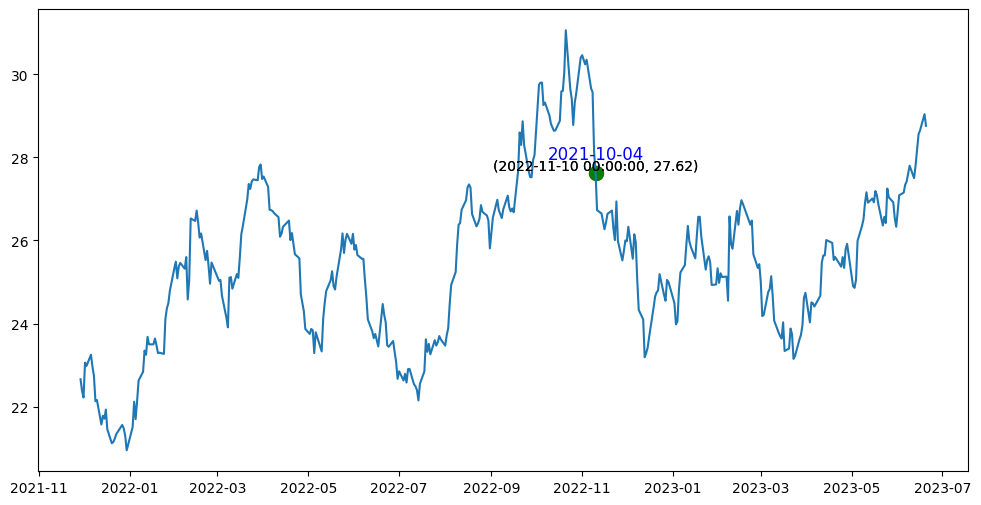

In [60]:

# Filtrar o DataFrame para exibir somente o período de queda
ibov_periodo_queda = ibov_itub4_5[(ibov_itub4_5.index >= data_inicio_queda) & (ibov_itub4_5.index <= ponto_maior_queda.index[0])]

# Criar um gráfico do período de queda com destaque para o início da queda e o pico de queda
plt.figure(figsize=(12, 6))
plt.plot(ibov_itub4_5.index, ibov_itub4_5["Close"], label="Índice Bovespa")
plt.plot(ibov_periodo_queda.index, ibov_periodo_queda["Close"], label="Período de Queda", color='orange')
plt.scatter(data_inicio_queda, valor_inicio_queda, color='red', label='Início da Queda', s=100, marker='o')
plt.scatter(ponto_maior_queda.index[0], ponto_maior_queda["Close"].values[0], color='green', label='Pico de Queda', s=100, marker='o')

# Adicionar anotação para o dia '2021-10-04'
plt.annotate('2021-10-04', (data_inicio_queda, valor_inicio_queda), textcoords="offset points", xytext=(0,10), ha='center', fontsize=12, color='blue')

# Adicionar rótulo para os pontos
plt.text(data_inicio_queda, valor_inicio_queda, f'({data_inicio_queda}, {valor_inicio_queda:.2f})', ha='center', va='bottom')
plt.text(ponto_maior_queda.index[0], ponto_maior_queda["Close"].values[0], f'({ponto_maior_queda.index[0]}, {ponto_maior_queda["Close"].values[0]:.2f})', ha='center', va='bottom')


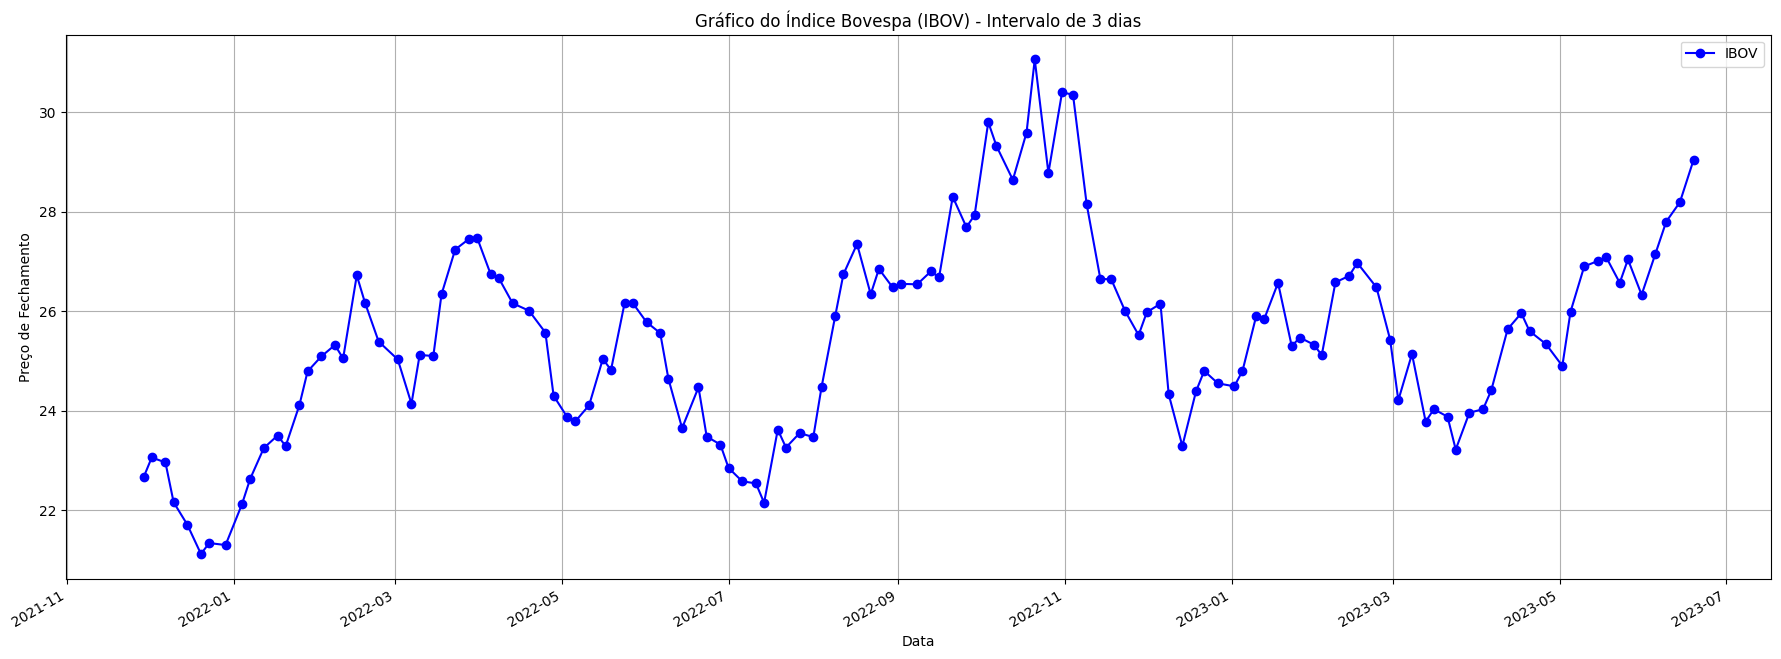

In [61]:
import matplotlib.pyplot as plt

# Supondo que você já tenha um DataFrame chamado "ibov" com os dados do índice Bovespa, incluindo a coluna "Close"

# Selecionar os dados a cada 3 dias
ibov_3_day_interval = ibov_itub4_5["Close"].iloc[::3]

# Plotar o gráfico
plt.figure(figsize=(22, 8))
ibov_3_day_interval.plot(marker='o', linestyle='-', color='b', label="IBOV")
plt.title("Gráfico do Índice Bovespa (IBOV) ")
plt.xlabel("Data")
plt.ylabel("Preço de Fechamento")
plt.legend()
plt.grid(True)
plt.show()

procurando outras açoes para comparar\

In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#!pip install yfinance --upgrade --no-cache-dir
import yfinance as yf

In [63]:

tickers = "ABEV3.SA ITSA4.SA WEGE3.SA USIM5.SA VALE3.SA itub4.sa itub3.sa amer3.sa CVCB3.sa"

carteira = yf.download(tickers, period="5y")["Adj Close"]

ibov = yf.download("^BVSP", period="5y")["Adj Close"]

[*********************100%%**********************]  9 of 9 completed
[*********************100%%**********************]  1 of 1 completed


In [64]:
carteira.dropna(inplace=True)
carteira

,ABEV3.SA,AMER3.SA,CVCB3.SA,ITSA4.SA,ITUB3.SA,ITUB4.SA,USIM5.SA,VALE3.SA,WEGE3.SA
Date,,,,,,,,,
2018-10-24,13.449246,33.167210,51.995525,7.026503,21.860800,26.218018,7.896540,37.496975,9.022985
2018-10-25,12.695953,33.574173,54.880341,7.105305,22.392540,26.521402,8.059357,37.620972,8.864444
2018-10-26,12.856769,33.147835,56.613194,7.249773,22.446255,27.017853,8.189609,38.302990,8.430781
2018-10-29,13.059905,31.277754,55.028023,7.151272,22.263636,26.521402,8.165185,36.580738,8.160324
2018-10-30,13.584669,34.213676,56.859337,7.427078,22.967260,27.299152,8.433830,37.111191,8.533368
...,...,...,...,...,...,...,...,...,...
2023-10-18,12.530000,0.790000,2.710000,8.698792,22.990000,26.750000,6.180000,65.360001,34.290001
2023-10-19,12.520000,0.780000,2.560000,8.748500,23.160000,27.059999,6.100000,64.419998,33.939999
2023-10-20,12.490000,0.800000,2.500000,8.740000,23.129999,26.959999,5.950000,62.680000,33.810001


In [65]:
#dropna() remover linhas ou colunas que contenham valores ausentes (NaN)
ibov.dropna(inplace=True)
ibov

Date
2018-10-24     83064.0
2018-10-25     84084.0
2018-10-26     85720.0
2018-10-29     83797.0
2018-10-30     86886.0
                ...   
2023-10-18    114060.0
2023-10-19    114004.0
2023-10-20    113155.0
2023-10-23    112785.0
2023-10-24    113762.0
Name: Adj Close, Length: 1240, dtype: float64

In [66]:
ibov_itub4.dropna(inplace=True)
ibov_itub4

,Open,High,Low,Close,Adj Close,Volume,Daily Change
Date,,,,,,,
2000-12-22,2.930748,2.930748,2.814843,2.832229,1.630730,23312,-0.043344
2000-12-25,2.832229,2.832229,2.832229,2.832229,1.630730,0,0.000000
2000-12-26,2.816664,2.834712,2.790006,2.831401,1.630252,7851,-0.000292
2000-12-27,2.881074,2.927437,2.831401,2.927437,1.685549,26996,0.033918
2000-12-28,2.910879,3.129443,2.864351,3.063211,1.763723,77425,0.046380
...,...,...,...,...,...,...,...
2023-06-14,27.969999,28.219999,27.770000,28.190001,27.588177,49889400,0.013664
2023-06-15,28.100000,28.600000,28.080000,28.559999,27.950277,26763200,0.013125
2023-06-16,28.490000,28.840000,28.250000,28.650000,28.038353,41611300,0.003151


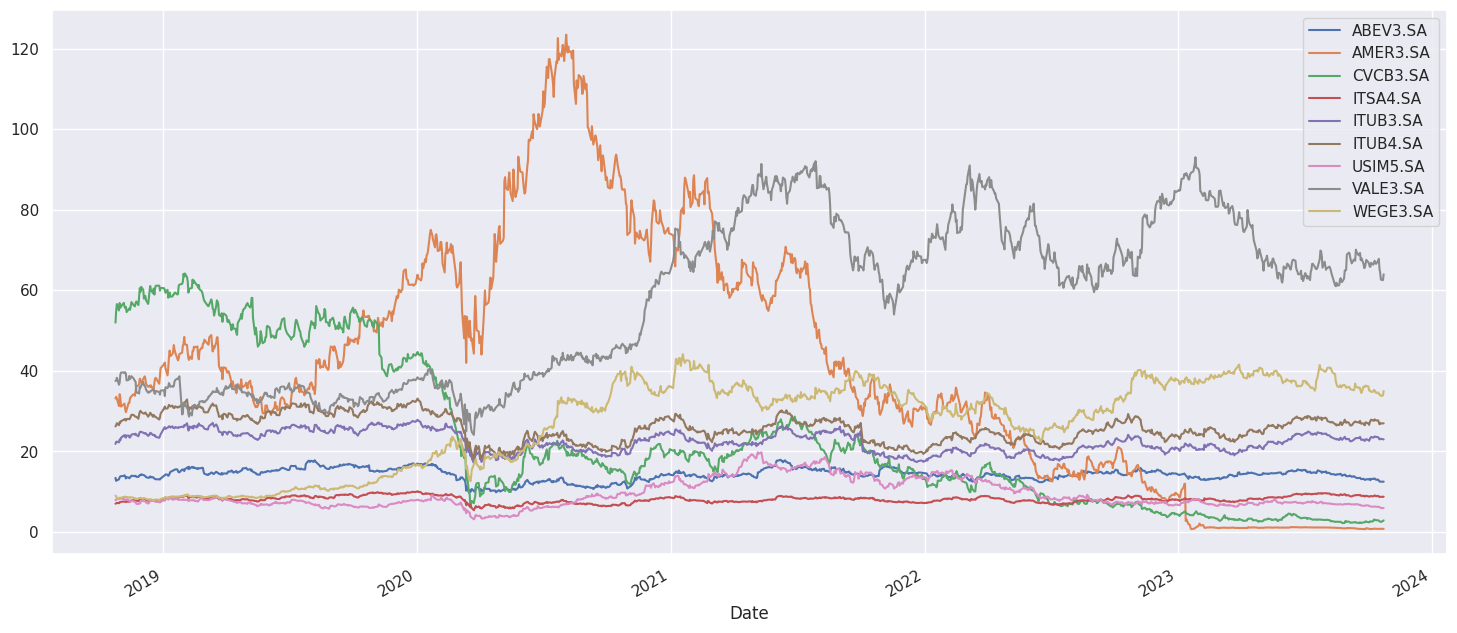

In [67]:
sns.set()
carteira.plot(figsize=(18,8));


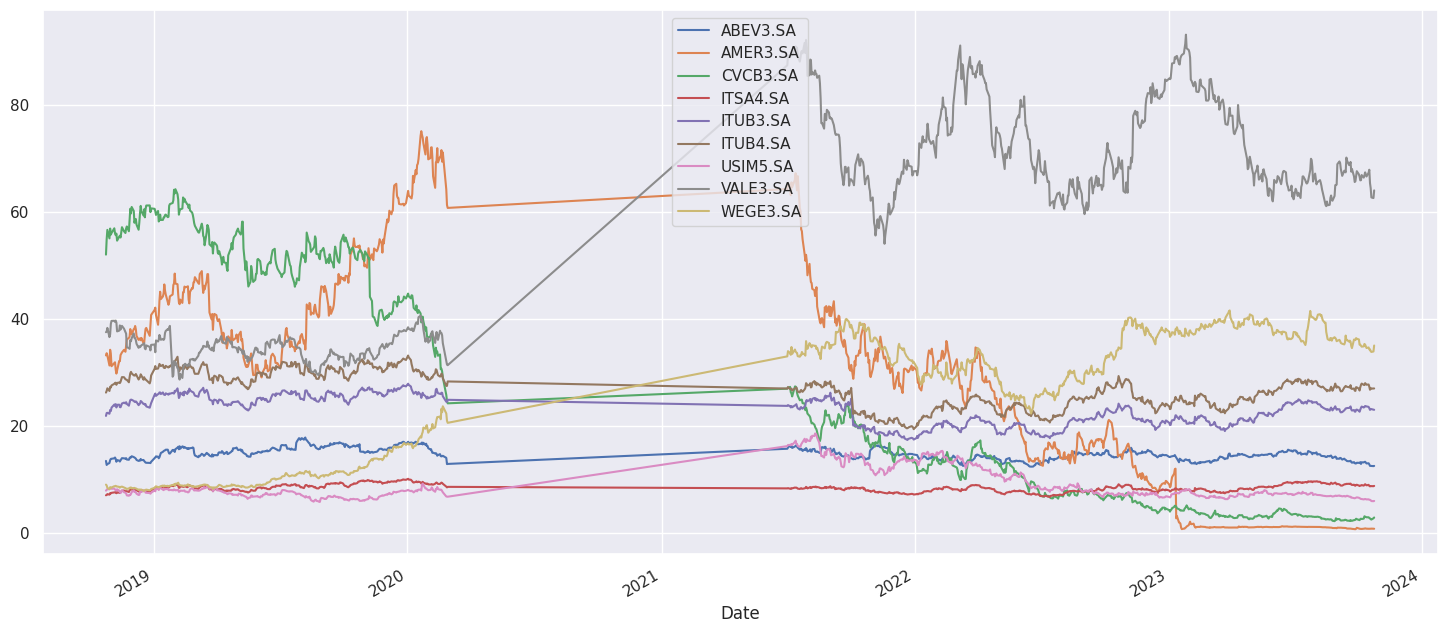

In [68]:
import pandas as pd

# Supondo que "carteira" é o DataFrame com os dados financeiros

# Definir o período da pandemia
inicio_pandemia = pd.Timestamp('2020-03-01')
fim_pandemia = pd.Timestamp('2021-06-30')

# Filtrar os dados para remover o período da pandemia
carteira_sem_pandemia = carteira[(carteira.index < inicio_pandemia) | (carteira.index > fim_pandemia)]

# Agora você pode usar o DataFrame "carteira_sem_pandemia" para suas análises
sns.set()
carteira_sem_pandemia.plot(figsize=(18,8));

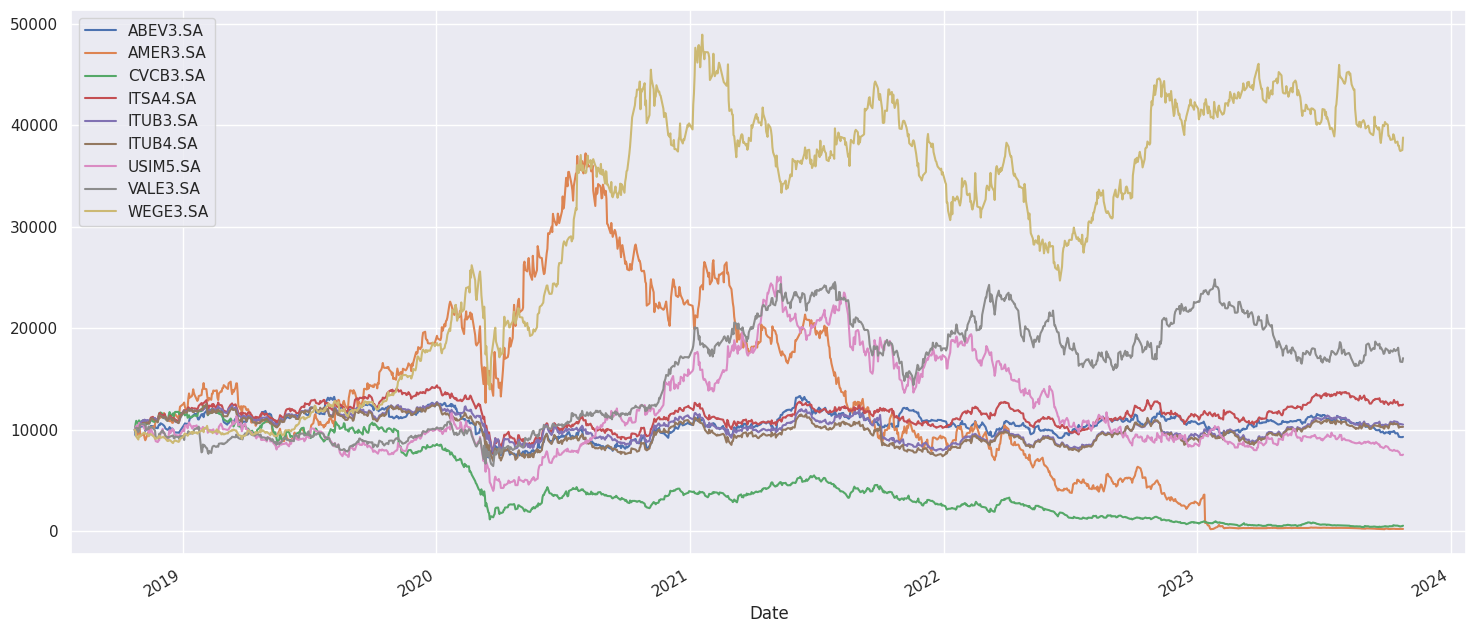

In [69]:
carteira_normalizada = (carteira / carteira.iloc[0])*10000
carteira_normalizada.dropna(inplace=True)
carteira_normalizada.plot(figsize=(18,8));

In [72]:
acoes = "ABEV3.SA ITSA4.SA WEGE3.SA USIM5.SA VALE3.SA ^BVSP"
dados_yahoo = yf.download(tickers=tickers, period="5y")['Adj Close']
retorno = dados_yahoo.pct_change()
retorno

[*********************100%%**********************]  9 of 9 completed


,ABEV3.SA,AMER3.SA,CVCB3.SA,ITSA4.SA,ITUB3.SA,ITUB4.SA,USIM5.SA,VALE3.SA,WEGE3.SA
Date,,,,,,,,,
2018-10-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-10-25,-0.056010,0.012270,0.055482,0.011215,0.024324,0.011572,0.020619,0.003307,-0.017571
2018-10-26,0.012667,-0.012698,0.031575,0.020333,0.002399,0.018719,0.016162,0.018129,-0.048921
2018-10-29,0.015800,-0.056416,-0.028000,-0.013587,-0.008136,-0.018375,-0.002982,-0.044964,-0.032080
2018-10-30,0.040181,0.093866,0.033280,0.038568,0.031604,0.029326,0.032901,0.014501,0.045714
...,...,...,...,...,...,...,...,...,...
2023-10-18,-0.021094,0.025974,-0.032143,-0.010181,-0.013305,-0.020864,-0.003226,-0.036699,0.000292
2023-10-19,-0.000798,-0.012658,-0.055351,0.005714,0.007395,0.011589,-0.012945,-0.014382,-0.010207
2023-10-20,-0.002396,0.025641,-0.023437,-0.000972,-0.001295,-0.003696,-0.024590,-0.027010,-0.003830


In [73]:
retorno_acumulado = (1 + retorno).cumprod()
retorno_acumulado.iloc[0] = 1
retorno_acumulado


,ABEV3.SA,AMER3.SA,CVCB3.SA,ITSA4.SA,ITUB3.SA,ITUB4.SA,USIM5.SA,VALE3.SA,WEGE3.SA
Date,,,,,,,,,
2018-10-24,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2018-10-25,0.943990,1.012270,1.055482,1.011215,1.024324,1.011572,1.020619,1.003307,0.982429
2018-10-26,0.955947,0.999416,1.088809,1.031775,1.026781,1.030508,1.037113,1.021495,0.934367
2018-10-29,0.971051,0.943032,1.058322,1.017757,1.018427,1.011572,1.034021,0.975565,0.904393
2018-10-30,1.010069,1.031551,1.093543,1.057009,1.050614,1.041238,1.068041,0.989712,0.945736
...,...,...,...,...,...,...,...,...,...
2023-10-18,0.931651,0.023819,0.052120,1.237998,1.051654,1.020291,0.782621,1.743074,3.800293
2023-10-19,0.930907,0.023517,0.049235,1.245072,1.059431,1.032115,0.772490,1.718005,3.761503
2023-10-20,0.928677,0.024120,0.048081,1.243862,1.058059,1.028301,0.753494,1.671602,3.747095


In [74]:

!pip install yfinance --upgrade --no-cache-dir
import yfinance as yf
#import pandas_datareader.data as web
#yf.pdr_override()

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Para corrgir o bug: AttributeError: 'numpy.int64' object has no attribute 'to_pydatetime'
!pip install git+https://github.com/quantopian/pyfolio

import pyfolio as pf
import warnings
warnings.filterwarnings('ignore')

  Cloning https://github.com/quantopian/pyfolio to /tmp/pip-req-build-s4e94ws4
  Running command git clone --filter=blob:none --quiet https://github.com/quantopian/pyfolio /tmp/pip-req-build-s4e94ws4
  Resolved https://github.com/quantopian/pyfolio to commit 4b901f6d73aa02ceb6d04b7d83502e5c6f2e81aa
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.8/52.8 kB 779.5 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 19.9 MB/s eta 0:00:00
  Created wheel for pyfolio: filename=pyfolio-0.9.2+75.g4b901f6-py3-none-any.whl size=75753 sha256=93835d51daf6b32184d74455f80c5d92495d08cbc905fda1790e28aac46f1dc8
  Stored in directory: /tmp/pip-ephem-wheel-cache-oh0gyxk7/wheels/25/2f/dd/558b6be9405213c9f6fdb1c5a062028a4da70862268f4116e6
  Created wheel for empyrical: filename=empyrical-0.5.5-py3-none-any.whl size=39755 sha256=5fa808fe578ceb86b5aa361895b378ffc43c63f35876c4d38da585543625c4af
  Stored in

/usr/local/lib/python3.10/dist-packages/pyfolio/pos.py:26: UserWarning: Module "zipline.assets" not found; multipliers will not be applied to position notionals.
  warnings.warn(


In [ ]:
!pip install yfinance --upgrade --no-cache-dir
import yfinance as yf
#import pandas_datareader.data as web
#yf.pdr_override()

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


import pyfolio as pf
import warnings
warnings.filterwarnings('ignore')


In [77]:
#
pf.create_full_tear_sheet(carteira["retorno"], benchmark_rets=retorno["^BVSP"])

KeyError: ignored